# Experiment 1: Vectorization techniques and 1D Convolutional Neural Network (1D CNN) comparison

The objective is to determine which vectorization technique is more effective for preprocessing text data and improving the performance of 1D CNN models in sequence classification tasks.

In [ ]:
%pip install datasets
%pip install transformers
%pip install spacy
%pip install torch
%pip install tensorflow
%pip install spacy-transformers
%pip install transformers[torch]
%pip install seqeval
!pip install wordcloud

### Importing Libraries:

We have to import specific python libraries that provide necessary functions and tools for handling the data and performing analyses.

In [10]:
# For data manipulation
import pandas as pd
# For numerical operations
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
# For splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
# For classification tasks
from sklearn.svm import SVC
# For accessing the performance metrics
from sklearn.metrics import classification_report
# For working with text
import nltk
# for filtering commonly used words
from nltk.corpus import stopwords
# For stemming words
from nltk.stem import PorterStemmer
# For splitting texts into tokens
from nltk.tokenize import word_tokenize

### Loading Dataset:

I have chosen to use Hugging Face Datasets' "surrey-nlp/PLOD-CW" dataset for this investigation which is available in Surrey learn.

In [11]:
# For loading "surrey-nlp/PLOD-CW" dataset from Hugging Face.
from datasets import load_dataset, load_metric
dataset = load_dataset("surrey-nlp/PLOD-CW")

# Convert the 'train' split of the PLOD-CW dataset to a Pandas DataFrame for easier manipulation and analysis.
df = dataset['train'].to_pandas()

### Data Information:

After loading the dataset, we are getting an overview of the data using `head()` function.

Featues breakdown:

- **Tokens** - These are discrete words or symbols that were taken out of the dataset texts.
- **Part-of-speech tags (POS_tags)** - These are the grammatical information that are allocated to each token.
- **Named entity recognition tags (NER_tags)** - These tags group names, locations, organisations, and other attributes into predetermined categories for token classification.

In [15]:
# For displaying the first few rows of the DataFrame to preview its structure and the types of data it contains.
df.head()

,tokens,pos_tags,ner_tags
0,"[For, this, purpose, the, Gothenburg, Young, P...","[ADP, DET, NOUN, DET, PROPN, PROPN, PROPN, PRO...","[B-O, B-O, B-O, B-O, B-LF, I-LF, I-LF, I-LF, I..."
1,"[The, following, physiological, traits, were, ...","[DET, ADJ, ADJ, NOUN, AUX, VERB, PUNCT, ADJ, N...","[B-O, B-O, B-O, B-O, B-O, B-O, B-O, B-LF, I-LF..."
2,"[Minor, H, antigen, alloimmune, responses, rea...","[ADJ, PROPN, NOUN, ADJ, NOUN, ADV, VERB, ADP, ...","[B-O, B-AC, B-O, B-O, B-O, B-O, B-O, B-O, B-O,..."
3,"[EPI, =, Echo, planar, imaging, .]","[PROPN, PUNCT, NOUN, NOUN, NOUN, PUNCT]","[B-AC, B-O, B-LF, I-LF, I-LF, B-O]"
4,"[Furthermore, ,, eNOS, -, derived, NO, S, -, n...","[ADV, PUNCT, PROPN, PUNCT, VERB, PROPN, NOUN, ...","[B-O, B-O, B-AC, B-O, B-O, B-AC, B-O, B-O, B-O..."


In [16]:
# Count missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
tokens      0
pos_tags    0
ner_tags    0
dtype: int64


### Data Preparation and Performance Comparison:

- **Combine Tokens:**
Combining individual tokens into single strings for each sample in the training and test datasets.
- **Vectorization (TF-IDF):**
TfidfVectorizer is used to convert the train and test texts into a matrix of TF-IDF features.
- **Vectorization (Count):**
CountVectorizer is also used to transform texts into a matrix of token counts. This creates a different representation that could be used to train models as an alternative to TF-IDF features.
- **Label Encoding:**
Creating a LabelEncoder instance, which is used to encode the labels numerically. This is necessary because machine learning models don't work with categorical labels directly; they require numerical inputs.
- **One-Hot Encoding of Labels:**
The numerical labels are then converted to a one-hot encoded format using to_categorical, which is necessary for classification with neural networks since the output layer will likely use softmax activation that expects this format. This step creates a binary matrix representation of the labels.
- **Building the 1D CNN Model:**
A 1D CNN model is created using a stack of layers. It starts with a convolutional layer that filters the input text, followed by a pooling layer that simplifies the output from the convolutional layer, and ends with a dense layer that decides the class of the input text based on the features extracted by the convolutional layer.
- **Training the Model with TF-IDF Data:**
The model is then taught using the TF-IDF transformed text data. TF-IDF is a way to turn text into numbers that the model can understand, highlighting which words are important in a document.
- **Making Predictions with TF-IDF Data:**
After learning, the model uses what it knows to make predictions on new, unseen text data that has also been turned into numbers with TF-IDF.
- **Training the Model with Count Vector Data:**
Now The model learns from count vector data, which is another way to turn text into numbers by simply counting how often each word appears.
- **Making Predictions with Count Vector Data:**
The model, now trained with count vector data, makes another set of predictions on new, unseen text data that has been turned into numbers using the count method.
- **Evaluating the Models:**
The model's performance is checked by comparing its predictions to the actual classes of the text data. A report is printed showing how well the model did for each type of class it was supposed to identify.
- **Visualizing the Results:**
The results are also shown in confusion matrices, which are special charts that help visualize where the model is making correct predictions and where it's getting confused. These charts show the predicted classes against the actual classes using color intensity to indicate the number of predictions.

Epoch 1/10


/Users/wilson/anaconda3/envs/NLP/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9108 - loss: 1.2350 - val_accuracy: 0.8651 - val_loss: 0.9500
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.9069 - loss: 0.8296 - val_accuracy: 0.8651 - val_loss: 0.6637
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.9021 - loss: 0.5534 - val_accuracy: 0.8651 - val_loss: 0.5519
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.9158 - loss: 0.4131 - val_accuracy: 0.8651 - val_loss: 0.5399
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.9109 - loss: 0.4061 - val_accuracy: 0.8651 - val_loss: 0.5384
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.8968 - loss: 0.4530 - val_accuracy: 0.8651 - val_loss: 0.5354
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.9017 - loss: 0.4291 - val_accuracy: 0.8651 - val_loss: 0.5328
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.9142 - loss: 0.3893 - val_accuracy: 0.8651 - val_loss: 0.

/Users/wilson/anaconda3/envs/NLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/wilson/anaconda3/envs/NLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/wilson/anaconda3/envs/NLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

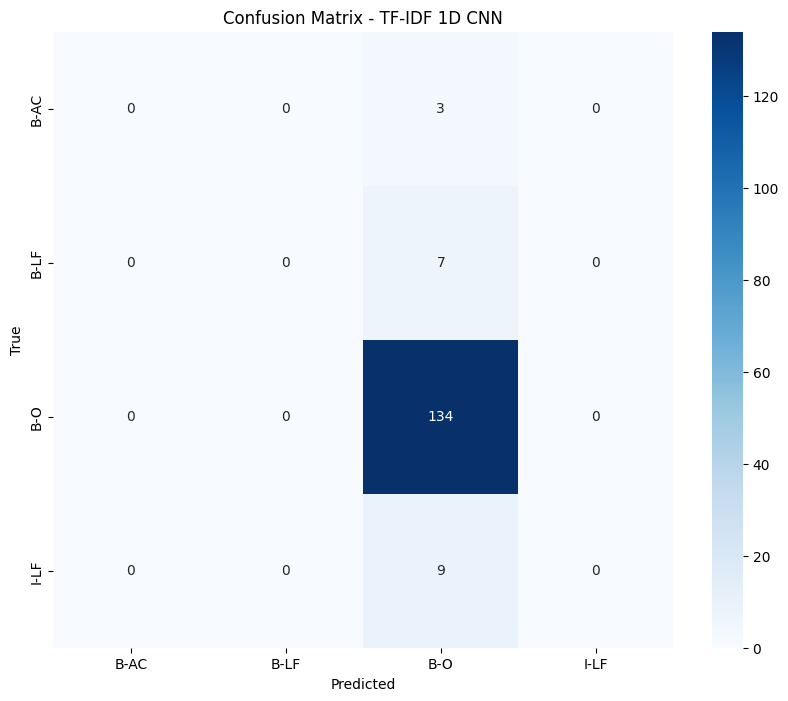

Count Vectorization 1D CNN Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         7
           2       0.88      1.00      0.93       134
           3       0.00      0.00      0.00         9

    accuracy                           0.88       153
   macro avg       0.22      0.25      0.23       153
weighted avg       0.77      0.88      0.82       153



/Users/wilson/anaconda3/envs/NLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/wilson/anaconda3/envs/NLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/wilson/anaconda3/envs/NLP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

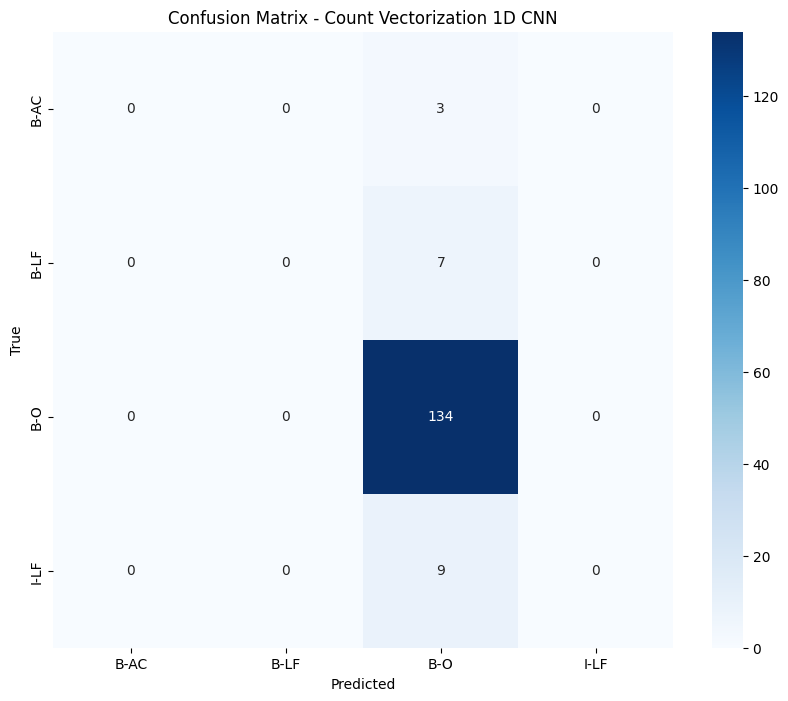

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# Combine tokens into single strings per sample
train_texts = [" ".join(tokens) for tokens in dataset['train']['tokens']]
test_texts = [" ".join(tokens) for tokens in dataset['test']['tokens']]

# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  
X_train_tfidf = tfidf_vectorizer.fit_transform(train_texts).toarray()
X_test_tfidf = tfidf_vectorizer.transform(test_texts).toarray()

# Vectorization using Count Vectorizer
count_vectorizer = CountVectorizer(max_features=10000)  
X_train_count = count_vectorizer.fit_transform(train_texts).toarray()
X_test_count = count_vectorizer.transform(test_texts).toarray()

# Encode labels 
label_encoder = LabelEncoder()
all_possible_tags = set([tag for sublist in dataset['train']['ner_tags'] for tag in sublist] + [tag for sublist in dataset['test']['ner_tags'] for tag in sublist])
label_encoder.fit(list(all_possible_tags))
y_train = label_encoder.transform([tags[1] for tags in dataset['train']['ner_tags']])  # Correcting for assuming tags[1]
y_test = label_encoder.transform([tags[1] for tags in dataset['test']['ner_tags']])

# Convert labels to one-hot encoding
y_train_encoded = to_categorical(y_train, num_classes=len(label_encoder.classes_))
y_test_encoded = to_categorical(y_test, num_classes=len(label_encoder.classes_))

# Build the 1D CNN model
model_cnn = Sequential([
    Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train_tfidf.shape[1], 1)),
    GlobalMaxPooling1D(),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit and evaluate TF-IDF 1D CNN model
history_tfidf = model_cnn.fit(np.expand_dims(X_train_tfidf, -1), y_train_encoded, epochs=10, validation_split=0.2, batch_size=32)
y_pred_tfidf = np.argmax(model_cnn.predict(np.expand_dims(X_test_tfidf, -1)), axis=1)

# Fit and evaluate Count Vectorization 1D CNN model
history_count = model_cnn.fit(np.expand_dims(X_train_count, -1), y_train_encoded, epochs=10, validation_split=0.2, batch_size=32)
y_pred_count = np.argmax(model_cnn.predict(np.expand_dims(X_test_count, -1)), axis=1)

# Print classification reports for both models
print("TF-IDF 1D CNN Classification Report:")
print(classification_report(y_test, y_pred_tfidf))

# Plot confusion matrix for TF-IDF 1D CNN model
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - TF-IDF 1D CNN')
plt.show()

print("Count Vectorization 1D CNN Classification Report:")
print(classification_report(y_test, y_pred_count))

# Plot confusion matrix for Count Vectorization 1D CNN model
cm_count = confusion_matrix(y_test, y_pred_count)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_count, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Count Vectorization 1D CNN')
plt.show()


### Conclusion:

Based on the classification reports provided for the 1D CNN models trained with TF-IDF and count vectorized data, we can draw several conclusions:

- **Dominant Class Performance:**
Both models performed very well in classifying documents of class 2, with a precision and recall of 0.88 and 1.00 respectively, resulting in an f1-score of 0.93. This suggests that the models have learned patterns that are strongly indicative of class 2.
- **Performance on Other Classes:**
For classes 0, 1, and 3, both models failed to correctly predict any samples, as indicated by the precision and recall scores of 0.00. This implies that the models could not find patterns that distinguished these classes from class 2 or possibly there were not enough examples to learn from.
- **Overall Accuracy:**
The accuracy of both models is 0.88, but this high accuracy is largely due to the models' ability to correctly classify the dominant class (class 2), which makes up the majority of the test samples.
- **Model Limitations:**
The zero scores for classes other than class 2 indicate that the models are not generalizing well across different classes. This could be due to several factors including class imbalance, insufficient representative features for the minority classes, or too few training examples for those classes.